In [1]:
# Dont run this unless u want to disable GPU

import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
from jax import jit
import time

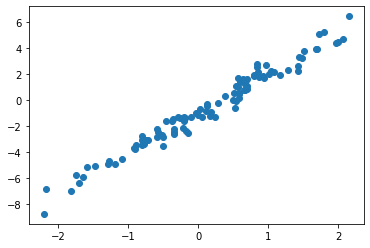

In [3]:

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.5, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys)


So imagine this model to be `y = wx + b`

In [5]:
# we create theta to house the parameters of our model

def model(theta, x):
    w,b = theta
    return w*x + b

In [7]:
# Loss function is mean squared error

def loss(theta, x, y):
    preds = model(theta, x)
    return jnp.mean((preds - y)**2)

In [8]:
# Update the params, theta, using gradient descent

def update(theta, x, y, lr=0.1):
    grads = jax.grad(loss)(theta, x, y)
    return theta - lr * grads

w: 3.02, b: -0.97
Time taken: 3.784426689147949


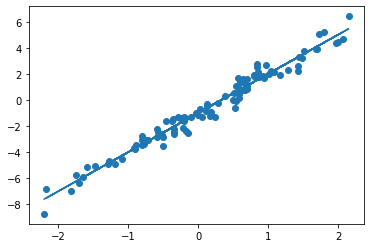

In [9]:
s = time.time()

theta = jnp.array([1.0, 1.0])

for _ in range (1000):
    theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")
print(f"Time taken: {time.time() - s}")


Using jit

In [10]:
@jax.jit
def update_jit(theta, x, y, lr=0.1):
    grads = jax.grad(loss)(theta, x, y)
    return theta - lr * grads


w: 3.02, b: -0.97
Time taken: 0.07355737686157227


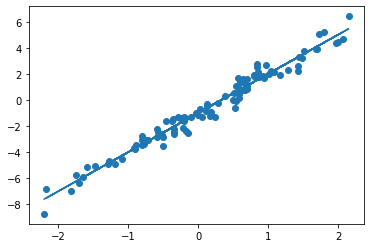

In [11]:
s = time.time()

theta = jnp.array([1.0, 1.0])

for _ in range(1000):
    theta = update_jit(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")
print(f"Time taken: {time.time() - s}")
